In [18]:
!pip install chart-studio
!pip install cufflinks

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/81.7 kB 435.7 kB/s eta 0:00:01
     --------------------------------- ---- 71.7/81.7 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 760.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for colorlover>=0.2.1 from https://files.pythonhosted.org/packages/9a/53/f696e4480b1d1de3b1523991dea71cf417c8b19fe70c704da164f3f90972/colorlover-0.3.0-py3-none-any.whl.metadata
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=089dbb509f5351fd47cca33899373dceb8ab542f318e9ad15c51b3ff563106bd
  Stored in directory: c:\users\rakes\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# Load the dataset
url = r"C:\123\zomato.csv"  # Replace with the actual URL or file path
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [20]:
df.describe(include = "all")

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
count,56235,56236,56233,56194,48414,56174,54956,56126,55914,28027,56049,55731,51642
unique,13397,11914,2639,2902,2877,5195,17712,2920,2961,8067,5553,2879,2783
top,('Rated 4.0',('Rated 4.0',Yes,No,NEW,0,('Rated 4.0',BTM,Quick Bites,('Rated 4.0',North Indian,300,Delivery
freq,942,300,30444,45268,2208,10027,412,5125,19132,407,2913,7576,24317


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [22]:
df.isnull().sum()

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

In [23]:
df["rest_type"].value_counts()

rest_type
Quick Bites                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 19132
Casual Dining                                                                                                                                                                                                                                                               

In [24]:
# Check for missing values in each column

print(df.isnull().sum())

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64


In [25]:
rest_type = df["rest_type"].value_counts(ascending = False)

In [26]:
rest_less_than_1000 = rest_type[rest_type<1000]
rest_less_than_1000

rest_type
Beverage Shop                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               867
Bar                                                                                                                                                                                                                                                                           

In [27]:
def rest_type(data):
    if data in rest_less_than_1000:
        return "Other"
    else:
        return data
df["rest_type"] = df["rest_type"].apply(rest_type)
df_rest = pd.DataFrame(df["rest_type"].value_counts())
df_rest

,count
rest_type,
Quick Bites,19132
Other,13518
Casual Dining,10330
Cafe,3732
Delivery,2607
Dessert Parlor,2263
"Takeaway, Delivery",2037
"Casual Dining, Bar",1154
Bakery,1141


In [30]:
px.pie(df_rest, values='count', names=df_rest.index, 
       title='Rest type count', 
       color_discrete_sequence=px.colors.sequential.RdBu)

In [31]:
df["location"].value_counts()
location = df["location"].value_counts(ascending = True)

location_lessthan_300 = location[location<300]
def location(data):
    if data in location_lessthan_300:
        return "Other"
    else:
        return data
df["location"] = df["location"].apply(location)
df["location"].value_counts()

location
Other                    8339
BTM                      5125
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1157
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1018
MG Road                   918
Banashankari              906
Kalyan Nagar              853
Richmond Road             812
Frazer Town               728
Malleshwaram              725
Basavanagudi              684
Residency Road            676
Banaswadi                 664
Brookefield               658
New BEL Road              649
Kammanahalli              648
Rajajinagar               592
Church Street             569
L

In [32]:
df_location = df.groupby(by=["location"]).count().reset_index()
df_location

,location,address,name,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,('Rated 4.0',409,409,408,408,409,409,409,409,408,406,408,399
1,('Rated 5.0',381,382,382,382,382,382,382,382,381,382,377,373
2,BTM,5125,5125,5125,5125,4262,5125,5009,5097,1522,5124,5098,4942
3,Banashankari,906,906,906,906,805,906,900,906,390,904,906,878
4,Banaswadi,664,664,664,664,499,664,636,656,204,664,653,622
5,Bannerghatta Road,1630,1630,1630,1630,1324,1630,1597,1624,508,1630,1617,1533
6,Basavanagudi,684,684,684,684,628,684,669,684,286,684,684,674
7,Bellandur,1286,1286,1286,1286,1078,1286,1252,1271,484,1286,1286,1197
8,Brigade Road,1218,1218,1218,1218,1084,1218,1196,1218,570,1218,1218,1072
9,Brookefield,658,658,658,658,581,658,652,658,307,658,656,615


In [33]:
px.bar(df_location, x='location', y='online_order', title='Number of online order per location',
      labels={'location': 'Location', 'online_order': 'Total Number of Online Order'})

In [34]:
import plotly.graph_objects as go

In [35]:
df['rate'].unique

<bound method Series.unique of 0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
56247    3.6 /5
56248       NaN
56249       NaN
56250    4.3 /5
56251    3.4 /5
Name: rate, Length: 56252, dtype: object>

In [36]:
# Cleaning Rate Columns

def rate(data):
    if data == "NEW" or data == "-":
        return np.nan
    else:
        data = str(data).split("/") 
        data = data[0]
        try:
            return float(data)
        except:
            return np.nan

In [37]:
df["rate"] = df["rate"].apply(rate)
# Now replace null value with mode

df["rate"] = df["rate"].fillna(df["rate"].mode()[0])

In [38]:
#Cleaning online order
def online(data):
    if data == "Yes" or data == "No":
        return data
    else:
        return "other"
    

In [39]:
df.online_order = df.online_order.apply(online)

In [40]:
fig = go.Figure()
fig.add_trace(go.Box(x=df.online_order, y=df.rate, marker_color='blue',
                    boxmean='sd'))

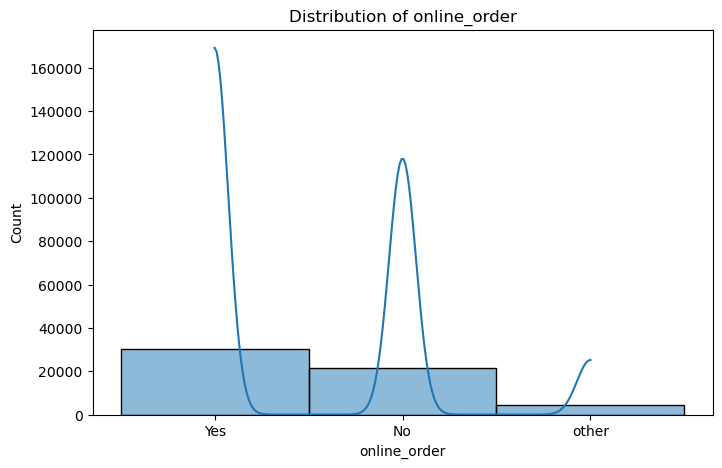

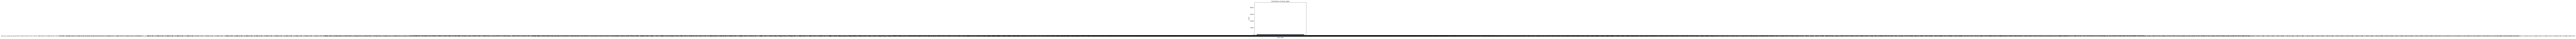

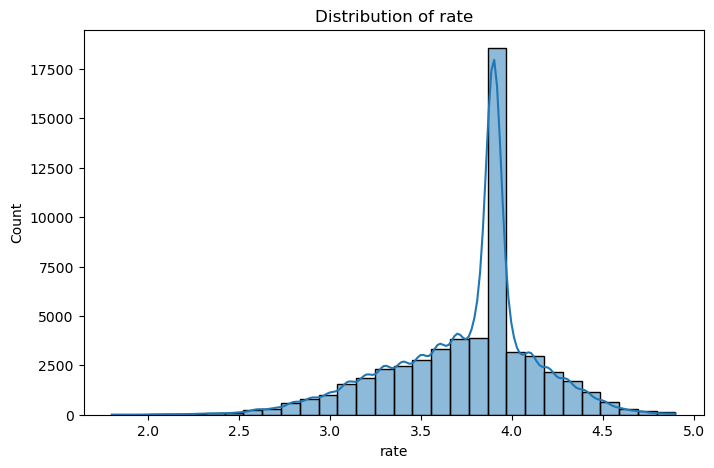


KeyboardInterrupt



In [42]:
# Plot histograms for the numerical columns
numerical_cols = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

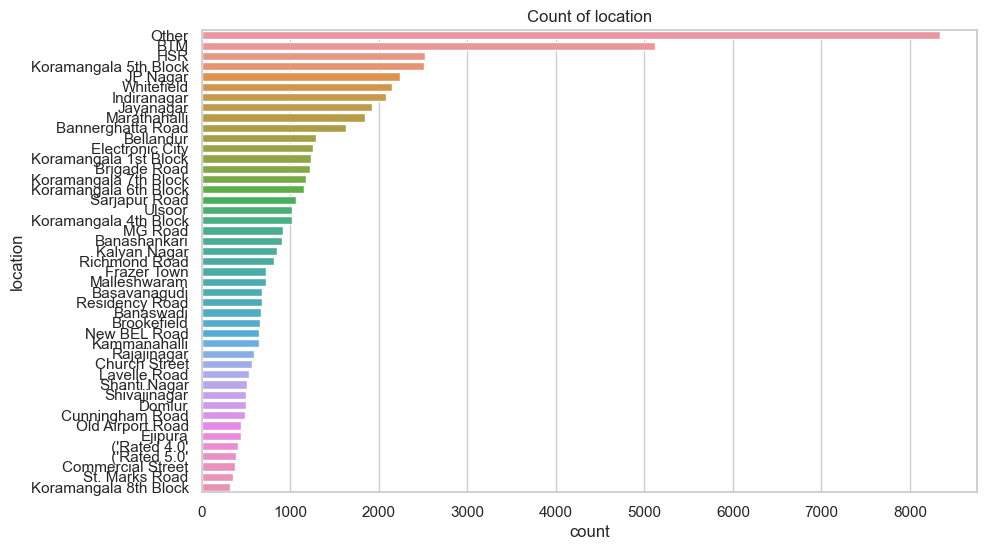

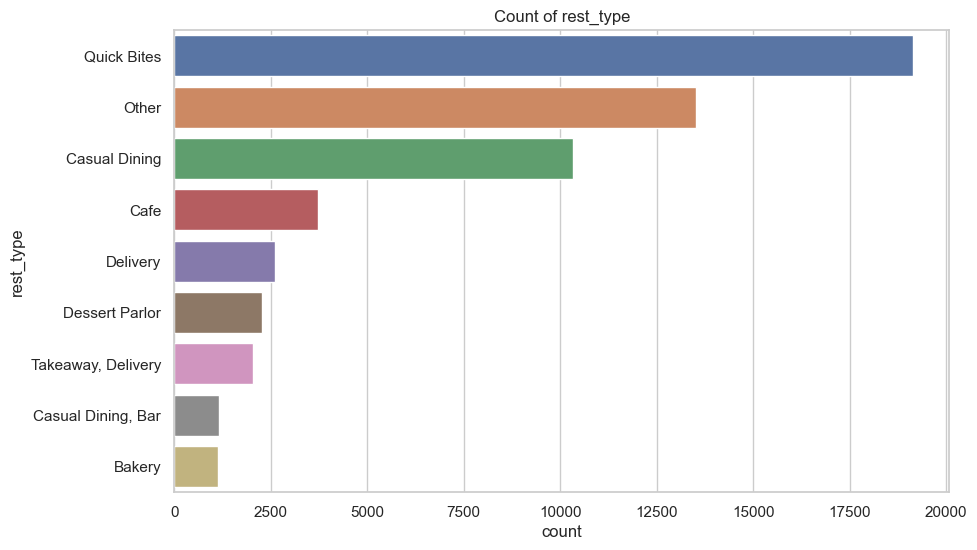

In [55]:
# Plot count plots for the categorical columns
categorical_cols = ['location', 'rest_type']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



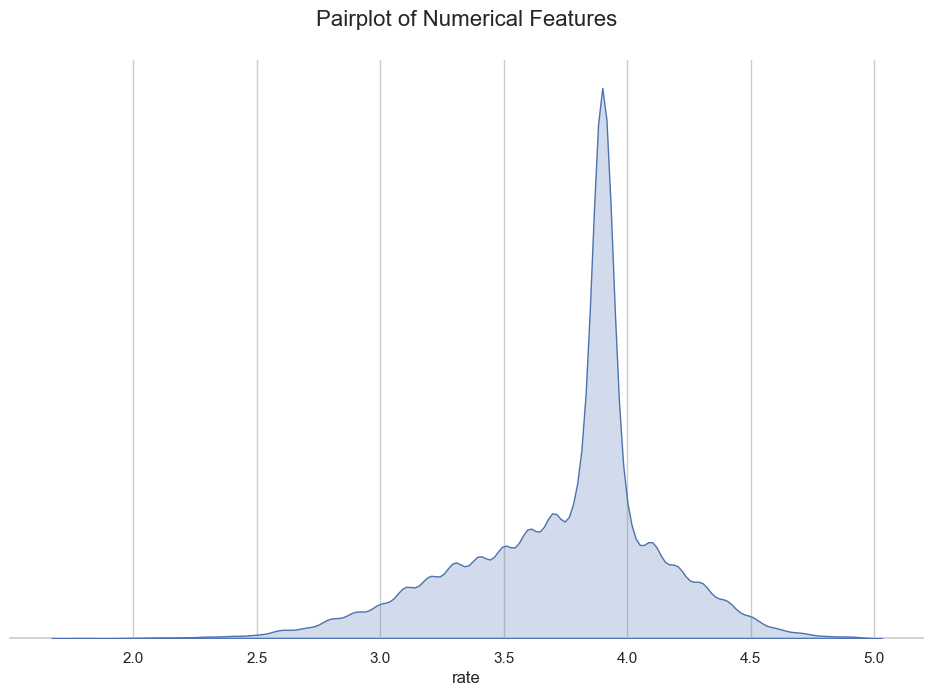

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for a modern look
sns.set_theme(style="whitegrid")  

# Customize color palette
palette = sns.color_palette("coolwarm")  

# Create pairplot with additional settings
g = sns.pairplot(df[numerical_cols], 
                 diag_kind='kde',  # Use KDE for better density visualization
                 markers="o", 
                 plot_kws={'alpha': 0.7, 's': 50},  # Adjust marker transparency & size
                 diag_kws={'shade': True},  # Smoother diagonal plots
                 corner=True,  # Show only lower triangle
                 palette=palette)

# Make the plot larger
g.fig.set_size_inches(10, 8)  

# Add title
plt.suptitle("Pairplot of Numerical Features", fontsize=16, y=1.02)  

plt.show()


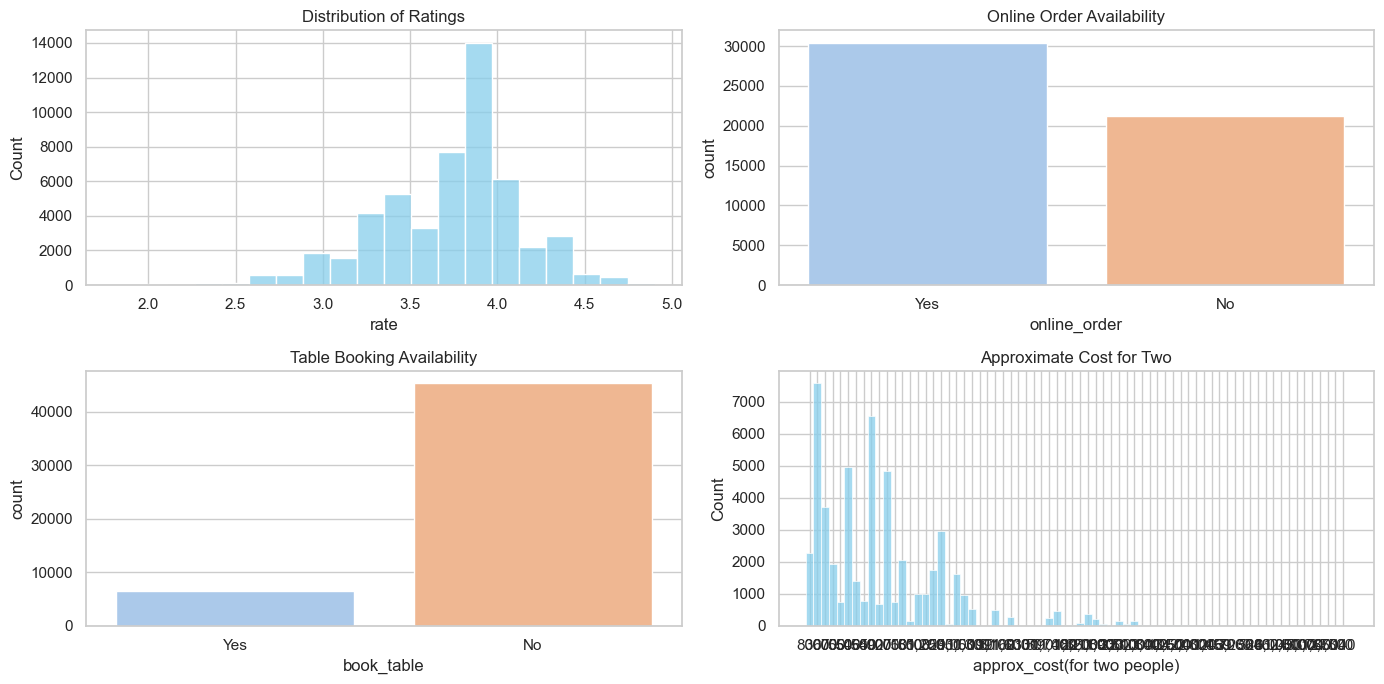

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Define the figure size
plt.figure(figsize=(14, 7))
df_cleaned = df[df['online_order'].isin(['Yes', 'No']) & df['book_table'].isin(['Yes', 'No'])]
# Distribution of Ratings
plt.subplot(221)
sns.histplot(df_cleaned['rate'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Ratings')

# Online Order Availability
plt.subplot(222)
sns.countplot(x='online_order', data=df_cleaned, palette='pastel')
plt.title('Online Order Availability')

# Table Booking Availability
plt.subplot(223)
sns.countplot(x='book_table', data=df_cleaned, palette='pastel')
plt.title('Table Booking Availability')

# Approximate Cost for Two
plt.subplot(224)
sns.histplot(df_cleaned['approx_cost(for two people)'], bins=20, kde=False, color='skyblue')
plt.title('Approximate Cost for Two')

# Adjust the layout
plt.tight_layout()

plt.show()

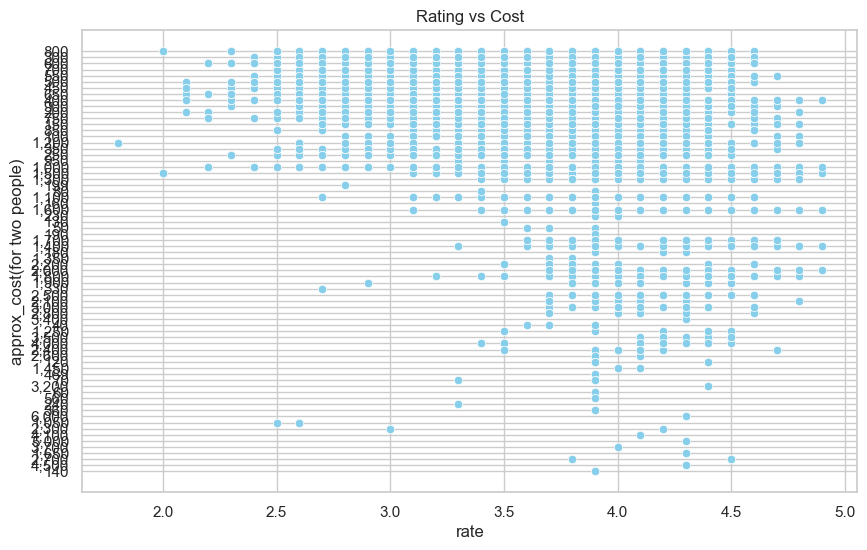

In [54]:
# Rating vs Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='approx_cost(for two people)', data=df_cleaned, color='skyblue')
plt.title('Rating vs Cost')
plt.show()